<a href="https://colab.research.google.com/github/Matej-Vylet/MPA-MLF/blob/main/lab2_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
# Defined 3 points in 2D-space:
X=np.array([[2, 1, 0],[4, 3, 0]])
# Calculate the covariance matrix:
R=np.matmul(X,X.T)/3
# Calculate the SVD decomposition and new basis vectors:
[U,D,V]=np.linalg.svd(R)  # call SVD decomposition
u1=U[:,0] # new basis vectors
u2=U[:,1]

print("u1 =", u1)
print("u2 =", u2)

X_proj = np.dot(U.T, X)
X_proj[1, :]=0
print(X_proj)

# Calculate the approximation of the original from new basis
#print(Xi1[:,None]) # add second dimention to array and test it


# Check that you got the original
X_reconstructed = np.dot(U, X_proj)
print(X_reconstructed)


u1 = [-0.40455358 -0.9145143 ]
u2 = [-0.9145143   0.40455358]
[[-4.46716435 -3.14809647  0.        ]
 [ 0.          0.          0.        ]]
[[1.80720735 1.27357371 0.        ]
 [4.08528566 2.87897923 0.        ]]


In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<function matplotlib.pyplot.show(close=None, block=None)>

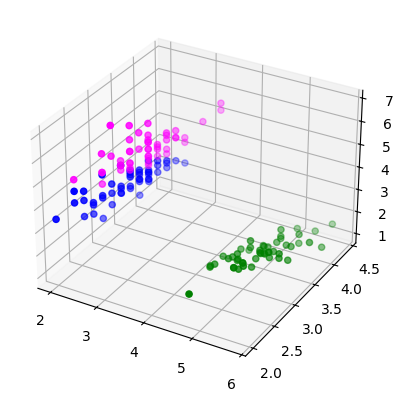

In [ ]:
X=iris.data
y=iris.target
import matplotlib.pyplot as plt
axes1=plt.axes(projection='3d')
axes1.scatter3D(X[y==0,0],X[y==0,1],X[y==0,2],color='green')
axes1.scatter3D(X[y==1,1],X[y==1,1],X[y==1,2],color='blue')
axes1.scatter3D(X[y==2,1],X[y==2,1],X[y==2,2],color='magenta')
plt.show

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


<function matplotlib.pyplot.show(close=None, block=None)>

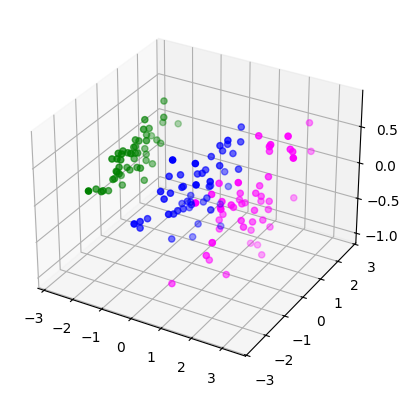

In [ ]:
from sklearn import preprocessing, decomposition
from sklearn.preprocessing import StandardScaler, MinMaxScaler
Xscaler = StandardScaler()
Xpp=Xscaler.fit_transform(X)

# define PCA object (three components), fit and transform the data
pca = decomposition.PCA(n_components=3)
pca.fit(Xpp)
Xpca = pca.transform(Xpp)
print(pca.get_covariance())
# you can plot the transformed feature space in 3D:
axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpca[y==0,0],Xpca[y==0,1],Xpca[y==0,2],color='green')
axes2.scatter3D(Xpca[y==1,0],Xpca[y==1,1],Xpca[y==1,2],color='blue')
axes2.scatter3D(Xpca[y==2,0],Xpca[y==2,1],Xpca[y==2,2],color='magenta')
plt.show

In [ ]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[2.93808505 0.9201649  0.14774182]
[0.72962445 0.22850762 0.03668922]


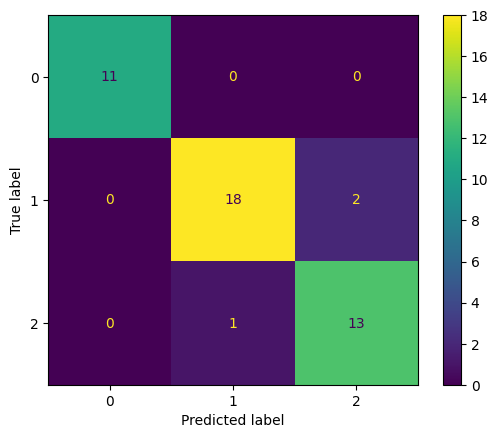

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X_train, X_test, y_train, y_test = train_test_split(Xpp, y, test_size=0.3)

knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train, y_train)
Ypred=knn1.predict(X_test)
confusion_matrix(y_test,Ypred)
ConfusionMatrixDisplay.from_predictions(y_test, Ypred)

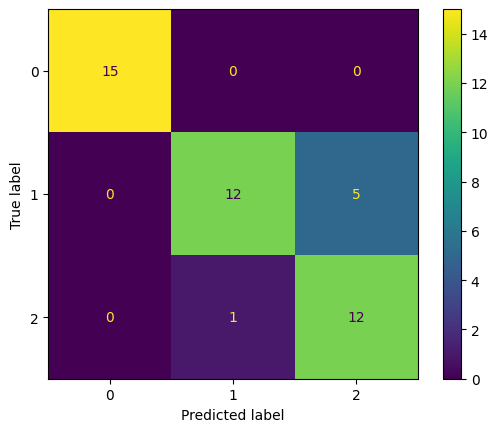

In [ ]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(Xpca[:, 0:2], y, test_size=0.3)
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X_train_pca, y_train_pca)
Ypred_pca = knn2.predict(X_test_pca)
confusion_matrix(y_test_pca,Ypred_pca)
ConfusionMatrixDisplay.from_predictions(y_test_pca, Ypred_pca)

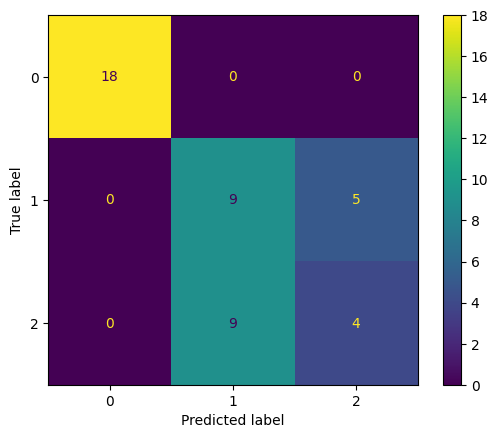

In [ ]:
X_train_X, X_test_X, y_train_X, y_test_X = train_test_split(X[:, 0:2][:, 0:2], y, test_size=0.3)
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train_X, y_train_X)
Ypred_X = knn3.predict(X_test_X)
confusion_matrix(y_test_X,Ypred_X)
ConfusionMatrixDisplay.from_predictions(y_test_X, Ypred_X)